# 4.1 多层感知机

### 构建思想：在网络中加入一个或多个隐藏层来克服线性模型的限制， 使其能处理更普遍的函数关系类型。 

### 构建方法：将许多全连接层堆叠在一起。 每一层都输出到上面的层，直到生成最后的输出。 我们可以把前\(L-1\)层看作表示，把最后一层看作线性预测器。 这种架构通常称为多层感知机（multilayer perceptron），通常缩写为MLP。 

## 4.1.1 多层感知机的结构

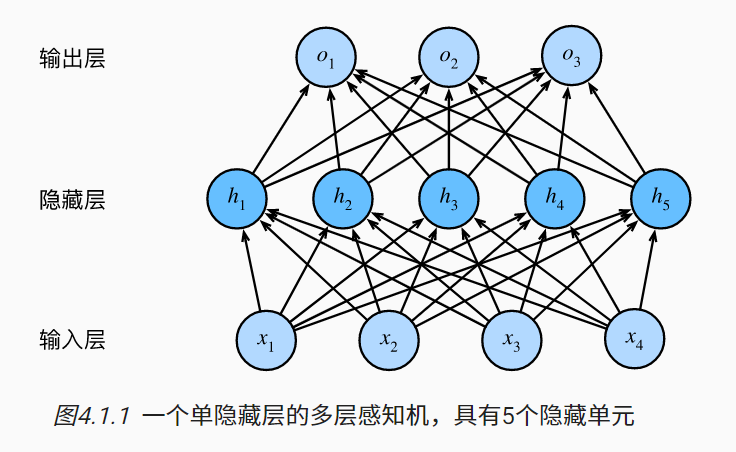

In [2]:
from IPython.display import Image
Image(filename=".\\image\\image\\多层感知机.png",width=600,height=400)

多层感知机由头尾的输入层、输出层和中间若干个隐藏层组成，每个圈代表一个单元（或称为通道、神经元等），箭头表示信息传递方式，这表明多层感知机的某一层任意一个单元所含有的信息都会传递到下一层的每个单元中。

## 4.1.2 多层感知机的运算

### 从线性模型到非线性模型

同之前的章节一样，
我们通过矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$
来表示$n$个样本的小批量，
其中每个样本具有$d$个输入特征。
对于具有$h$个隐藏单元的单隐藏层多层感知机，
用$\mathbf{H} \in \mathbb{R}^{n \times h}$表示隐藏层的输出，
称为*隐藏表示*（hidden representations）。
在数学或代码中，$\mathbf{H}$也被称为*隐藏层变量*（hidden-layer variable）
或*隐藏变量*（hidden variable）。
因为隐藏层和输出层都是全连接的，
所以我们有隐藏层权重$\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$
和隐藏层偏置$\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$
以及输出层权重$\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$
和输出层偏置$\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$。
形式上，我们按如下方式计算单隐藏层多层感知机的输出
$\mathbf{O} \in \mathbb{R}^{n \times q}$：

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$

事实上，经过这两步后，还是一个线性的模型。

为了发挥多层架构的潜力，
我们还需要一个额外的关键要素：
在仿射变换之后对每个隐藏单元应用非线性的*激活函数*（activation function）$\sigma$。
激活函数的输出（例如，$\sigma(\cdot)$）被称为*活性值*（activations）。
一般来说，有了激活函数，就不可能再将我们的多层感知机退化成线性模型：

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

由于$\mathbf{X}$中的每一行对应于小批量中的一个样本，
出于记号习惯的考量，
我们定义非线性函数$\sigma$也以按行的方式作用于其输入，
即一次计算一个样本。

为了构建更通用的多层感知机，
我们可以继续堆叠这样的隐藏层，
例如$\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$和$\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$，
一层叠一层，从而产生更有表达能力的模型。

## 4.1.3 激活函数

### 从上面的运算过程我们不难发现，激活函数是将多层感知机转化为一个非线性模型的关键

### 激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活， 它们将输入信号转换为输出的可微运算。 大多数激活函数都是非线性的。 通俗地说，激活函数就是神经网络中将数据由线性转化为非线性特征的函数。

以下是几种常见的激活函数：

## 4.1.3.1 ReLU函数

**$$\operatorname{ReLU}(x) = \max(x, 0).$$**

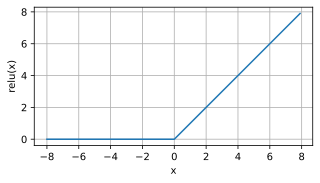

In [7]:
%matplotlib inline
import torch
import numpy as np
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

优点：梯度稳定，对负值恒为0，对正值恒为1，避免了后面提到的梯度爆炸、梯度消失问题

缺点：忽略了所有的负值，信息提取不全

注意，ReLU函数有许多变体，包括*参数化ReLU*（Parameterized ReLU，*pReLU*）
函数 :cite:`He.Zhang.Ren.ea.2015`。
该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

## 4.1.3.2 sigmod函数

sigmoid通常称为*挤压函数*（squashing function）：
它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

**$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$**

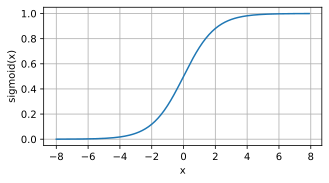

In [8]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

优点：它是最符合神经元信号的函数，0和1接近电信号的非激活和激活状态，在二分类问题上有很好的表现

缺点：当输入的值较大时，该函数的梯度接近0，容易出现梯度消失的问题；输出值恒为正，权重更新只能朝一个方向，影响迭代收敛效率

## 4.1.3.3 tanh函数

**$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$**

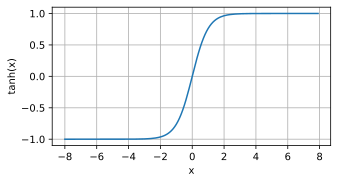

In [11]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

优点：解决了sigmod函数输出值恒为0的问题，使权重更新可以有不同方向

缺点：梯度为0的范围很大，梯度消失问题比sigmod函数更严重

# 4.2 多层感知机的逐步实现

In [85]:
# 读取Fashion-MNIST数据集
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()


def get_dataloader_workers():
    """Use 4 processes to read the data.

    Defined in :numref:`sec_utils`"""
    return 4

def load_data_fashion_mnist(batch_size, resize=None): 
    #@save """下载Fashion-MNIST数据集，然后将其加载到内存中""" 
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
        trans = transforms.Compose(trans)
        mnist_train = torchvision.datasets.FashionMNIST(
            root="D:\Anaconda\data", train=True, transform=trans, download=True)
        mnist_test = torchvision.datasets.FashionMNIST(
            root="D:\Anaconda\data", train=False, transform=trans, download=True)
        return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                                num_workers=get_dataloader_workers()),
                data.DataLoader(mnist_test, batch_size, shuffle=False,
                                num_workers=get_dataloader_workers()))
    
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=28)

### 初始化模型参数

回想一下，Fashion-MNIST中的每个图像由
$28 \times 28 = 784$个灰度像素值组成。
所有图像共分为10个类别。
忽略像素之间的空间结构，
我们可以将每个图像视为具有784个输入特征
和10个类的简单分类数据集。
首先，我们将[**实现一个具有单隐藏层的多层感知机，
它包含256个隐藏单元**]。
注意，我们可以将这两个变量都视为超参数。
通常，我们选择2的若干次幂作为层的宽度。
因为内存在硬件中的分配和寻址方式，这么做往往可以在计算上更高效。

下面用随机数的方法对模型的权重参数参数W和偏执参数b进行初始化，用几个张量来表示我们的参数。

注意，输入层到隐藏层有一次运算，隐藏层到输出层有一次运算，每次运算都需要有W和b

In [86]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 定义激活函数和模型运算

In [87]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)   # 定义relu函数

def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

### 定义损失函数——用softmax中的交叉熵

In [88]:
loss = nn.CrossEntropyLoss()

### 进行模型训练和测试

[**多层感知机的训练过程与softmax回归的训练过程完全相同**]。
可以直接调用`d2l`包的`train_ch3`函数，
将迭代周期数设置为10，并将学习率设置为0.1.

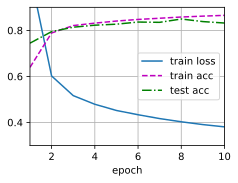

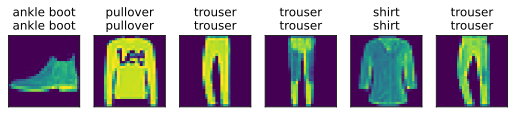

In [89]:
# 进行模型训练
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

# 测试模型拟合效果
d2l.predict_ch3(net, test_iter)

# 4.3 多层感知机的高级实现——调用高级API（库）

## 模型

在nn序列中添加了2个全连接层，第一层是784到256的隐藏层计算，经过ReLU激活后，再做隐藏层到输出层的计算。


In [92]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

# 初始化参数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

### 训练过程

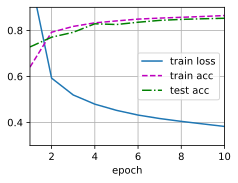

In [97]:
# 设置隐藏层批量数、学习率、迭代次数
batch_size, lr, num_epochs = 256, 0.1, 10
# 设置损失函数
loss = nn.CrossEntropyLoss()
# 设置训练模型
trainer = torch.optim.SGD(net.parameters(), lr=lr)
# 读取数据集
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=28)
# 展示分类结果
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 4.4 模型选择，欠拟合与过拟合

## 4.4.1 模型选择

在机器学习中，我们通常在评估几个候选模型后选择最终的模型。
这个过程叫做*模型选择*。

有时，需要进行比较的模型在本质上是完全不同的（比如，决策树与线性模型）。
有时，我们需要比较不同的超参数设置下的同一类模型。

例如，训练多层感知机模型时，我们可能希望比较具有
不同数量的隐藏层、不同数量的隐藏单元以及不同的激活函数组合的模型。
为了确定候选模型中的最佳模型，我们通常会使用验证集。

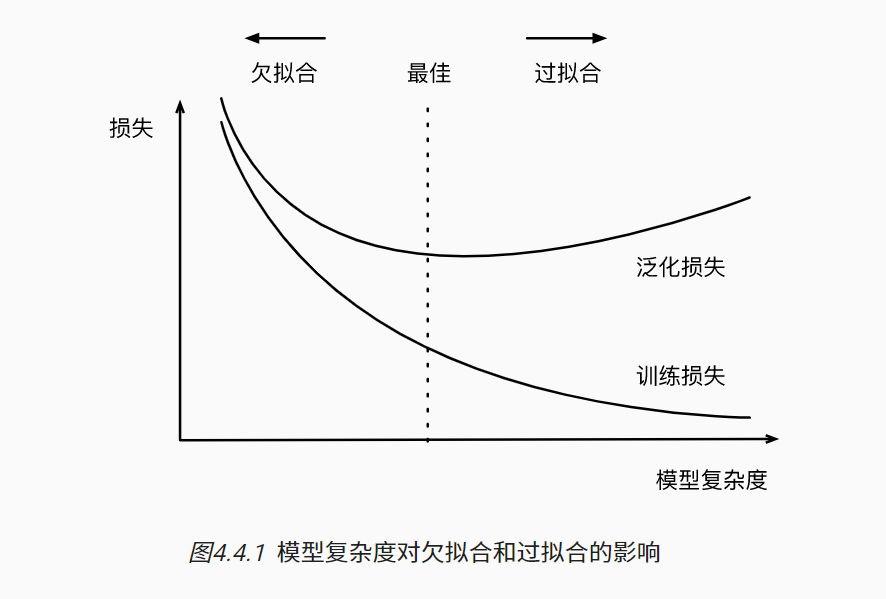

In [114]:
from IPython.display import Image
Image(filename=".\\image\\image\\欠拟合与过拟合.png",width=600,height=400)

### 4.4.2.1 验证集

原则上，在我们确定所有的超参数之前，我们不希望用到测试集。
如果我们在模型选择过程中使用测试数据，可能会有过拟合测试数据的风险，那就麻烦大了。

解决此问题的常见做法是将我们的数据分成三份，
除了训练和测试数据集之外，还增加一个*验证数据集*（validation dataset），
也叫*验证集*（validation set）。
但现实是验证数据和测试数据之间的边界模糊得令人担忧。
除非另有明确说明，否则在这本书的实验中，
我们实际上是在使用应该被正确地称为训练数据和验证数据的数据集，
并没有真正的测试数据集。
因此，书中每次实验报告的准确度都是验证集准确度，而不是测试集准确度。

### 4.4.2.2 K折交叉验证

当训练数据稀缺时，我们甚至可能无法提供足够的数据来构成一个合适的验证集。
这个问题的一个流行的解决方案是采用$K$*折交叉验证*。
这里，原始训练数据被分成$K$个不重叠的子集。
然后执行$K$次模型训练和验证，每次在$K-1$个子集上进行训练，
并在剩余的一个子集（在该轮中没有用于训练的子集）上进行验证。
最后，通过对$K$次实验的结果取平均来估计训练和验证误差。

## 4.4.2 训练误差和泛化误差

为了进一步讨论这一现象，我们需要了解训练误差和泛化误差。
*训练误差*（training error）是指，
模型在训练数据集上计算得到的误差。
*泛化误差*（generalization error）是指，
模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

问题是，我们永远不能准确地计算出泛化误差。
这是因为无限多的数据样本是一个虚构的对象。
在实际中，我们只能通过将模型应用于一个独立的测试集来估计泛化误差，
该测试集由随机选取的、未曾在训练集中出现的数据样本构成。


## 4.4.3 欠拟合与过拟合

当我们比较训练和验证误差时，我们要注意两种常见的情况。
首先，我们要注意这样的情况：训练误差和验证误差都很严重，
但它们之间仅有一点差距。
如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足），
无法捕获试图学习的模式。
此外，由于我们的训练和验证误差之间的*泛化误差*很小，
我们有理由相信可以用一个更复杂的模型降低训练误差。
这种现象被称为*欠拟合*（underfitting）。

另一方面，当我们的训练误差明显低于验证误差时要小心，
这表明严重的*过拟合*（overfitting）。
注意，*过拟合*并不总是一件坏事。
特别是在深度学习领域，众所周知，
最好的预测模型在训练数据上的表现往往比在保留（验证）数据上好得多。
最终，我们通常更关心验证误差，而不是训练误差和验证误差之间的差距。

是否过拟合或欠拟合可能取决于模型复杂性和可用训练数据集的大小，
这两个点将在下面进行讨论。

### 4.4.3.1 模型复杂性

首要原因是模型复杂性不合适。模型参数越多、计算形式越复杂，模型的复杂性就越高，高复杂性的模型往往倾向于更好地贴合训练集数据，往往会出现过拟合问题。而过低复杂性的模型对训练集数据信息提取不够彻底，容易出现欠拟合问题，因而控制模型的复杂性在一个合适范围内是值得我们注意的。

### 4.4.3.2 数据集大小

影响过拟合、欠拟合的另一个重要因素是数据集的大小。
训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。
随着训练数据量的增加，泛化误差通常会减小。
此外，一般来说，更多的数据不会有什么坏处。
对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。
给出更多的数据，我们可能会尝试拟合一个更复杂的模型。
能够拟合更复杂的模型可能是有益的。
如果没有足够的数据，简单的模型可能更有用。
对于许多任务，深度学习只有在有数千个训练样本时才优于线性模型。
从一定程度上来说，深度学习目前的生机要归功于
廉价存储、互联设备以及数字化经济带来的海量数据集。

## 4.4.4 用多项式回归演示欠拟合、过拟合与模型选择

### 生成数据集

给定$x$，我们将[**使用以下三阶多项式来生成训练和测试数据的标签：**]

**$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$**

噪声项$\epsilon$服从均值为0且标准差为0.1的正态分布。
在优化的过程中，我们通常希望避免非常大的梯度值或损失值。
这就是我们将特征从$x^i$调整为$\frac{x^i}{i!}$的原因，
这样可以避免很大的$i$带来的特别大的指数值。
我们将为训练集和测试集各生成100个样本。


In [99]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [100]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.0419],
         [ 0.7801]]),
 tensor([[ 1.0000e+00, -4.1862e-02,  8.7621e-04, -1.2227e-05,  1.2796e-07,
          -1.0713e-09,  7.4744e-12, -4.4699e-14,  2.3390e-16, -1.0879e-18,
           4.5543e-21, -1.7332e-23,  6.0463e-26, -1.9470e-28,  5.8217e-31,
          -1.6247e-33,  4.2509e-36, -1.0468e-38,  2.4345e-41, -5.3249e-44],
         [ 1.0000e+00,  7.8012e-01,  3.0430e-01,  7.9129e-02,  1.5433e-02,
           2.4079e-03,  3.1307e-04,  3.4891e-05,  3.4024e-06,  2.9492e-07,
           2.3007e-08,  1.6317e-09,  1.0608e-10,  6.3655e-12,  3.5471e-13,
           1.8448e-14,  8.9946e-16,  4.1276e-17,  1.7889e-18,  7.3450e-20]]),
 tensor([4.8591, 5.2493]))

**定义估计损失的函数**

In [108]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

**定义训练函数**

In [109]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### 选前四个维度，即3次模型进行训练（正常）

weight: [[ 4.9843683  1.1693524 -3.381235   5.644842 ]]


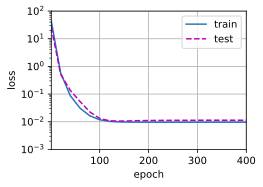

In [110]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 选前2个维度，即1次模型进行训练（欠拟合）

weight: [[2.483797 5.874323]]


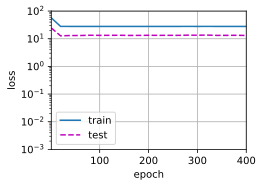

In [111]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 选所有维度，即20次模型进行训练（过拟合）

weight: [[ 4.990315    1.2721672  -3.425331    5.158169    0.03972458  1.1458496
   0.45431215 -0.06920363 -0.01691946 -0.131588    0.19940971 -0.167588
   0.08180142 -0.19480169 -0.14338782  0.19031638 -0.12255229  0.06130897
   0.01399443 -0.2096342 ]]


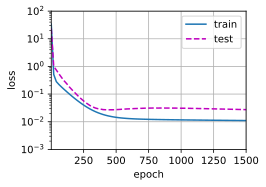

In [113]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

# 4.5 权重衰减（一种正则化技术）

### 正则化技术本质上是一种通过控制模型复杂度不至于太复杂来解决过拟合问题的方法。
前面章节我们已经描述了$L_2$范数和$L_1$范数，
它们是更为一般的$L_p$范数的特殊情况。

在训练参数化机器学习模型时，
*权重衰减*（weight decay）是最广泛使用的正则化的技术之一，
它通常也被称为$L_2$*正则化*。
这项技术通过函数与零的距离来衡量函数的复杂度，
因为在所有函数$f$中，函数$f = 0$（所有输入都得到值$0$）
在某种意义上是最简单的。
但是我们应该如何精确地测量一个函数和零之间的距离呢？
没有一个正确的答案。
事实上，函数分析和巴拿赫空间理论的研究，都在致力于回答这个问题。

一种简单的方法是通过线性函数
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$
中的权重向量的某个范数来度量其复杂性，
例如$\| \mathbf{w} \|^2$。
要保证权重向量比较小，
最常用方法是将其范数作为惩罚项加到最小化损失的问题中。
将原来的训练目标*最小化训练标签上的预测损失*，
调整为*最小化预测损失和惩罚项之和*。
现在，如果我们的权重向量增长的太大，
我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$。
这正是我们想要的。
让我们回顾一下 :numref:`sec_linear_regression`中的线性回归例子。
我们的损失由下式给出：

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

回想一下，$\mathbf{x}^{(i)}$是样本$i$的特征，
$y^{(i)}$是样本$i$的标签，
$(\mathbf{w}, b)$是权重和偏置参数。
为了惩罚权重向量的大小，
我们必须以某种方式在损失函数中添加$\| \mathbf{w} \|^2$，
但是模型应该如何平衡这个新的额外惩罚的损失？
实际上，我们通过*正则化常数*$\lambda$来描述这种权衡，
这是一个非负超参数，我们使用验证数据拟合：

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$

对于$\lambda = 0$，我们恢复了原来的损失函数。
对于$\lambda > 0$，我们限制$\| \mathbf{w} \|$的大小。
这里我们仍然除以$2$：当我们取一个二次函数的导数时，
$2$和$1/2$会抵消，以确保更新表达式看起来既漂亮又简单。
为什么在这里我们使用平方范数而不是标准范数（即欧几里得距离）？
我们这样做是为了便于计算。
通过平方$L_2$范数，我们去掉平方根，留下权重向量每个分量的平方和。
这使得惩罚的导数很容易计算：导数的和等于和的导数。

此外，为什么我们首先使用$L_2$范数，而不是$L_1$范数。
事实上，这个选择在整个统计领域中都是有效的和受欢迎的。
$L_2$正则化线性模型构成经典的*岭回归*（ridge regression）算法，
$L_1$正则化线性回归是统计学中类似的基本模型，
通常被称为*套索回归*（lasso regression）。
使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。
这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。
在实践中，这可能使它们对单个变量中的观测误差更为稳定。
相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，
而将其他权重清除为零。
这称为*特征选择*（feature selection），这可能是其他场景下需要的。


$L_2$正则化回归的小批量随机梯度下降更新如下式：

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新$\mathbf{w}$。
然而，我们同时也在试图将$\mathbf{w}$的大小缩小到零。
这就是为什么这种方法有时被称为*权重衰减*。
我们仅考虑惩罚项，优化算法在训练的每一步*衰减*权重。
与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。
较小的$\lambda$值对应较少约束的$\mathbf{w}$，
而较大的$\lambda$值对$\mathbf{w}$的约束更大。

是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，
在神经网络的不同层中也会有所不同。
通常，网络输出层的偏置项不会被正则化。

## 生成数据集
首先，我们[**像以前一样生成一些数据**]，生成公式如下：

**$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$**

我们选择标签是关于输入的线性函数。
标签同时被均值为0，标准差为0.01高斯噪声破坏。
为了使过拟合的效果更加明显，我们可以将问题的维数增加到$d = 200$，
并使用一个只包含20个样本的小训练集。

In [125]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

## 从零开始实现

下面我们将从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

### [**初始化模型参数**]

首先，我们将定义一个函数来随机初始化模型参数。


In [126]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

### (**定义$L_2$范数惩罚**)

实现这一惩罚最方便的方法是对所有项求平方后并将它们求和。


In [127]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

### 定义训练函数

In [128]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

### [**使用权重衰减**]

下面，我们使用权重衰减来运行代码。
注意，在这里训练误差增大，但测试误差减小。
这正是我们期望从正则化中得到的效果。


w的L2范数是： 0.39136338233947754


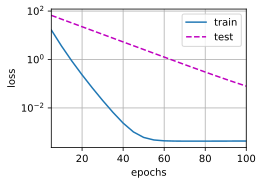

In [129]:
# 设置参数 lambd=3
train(lambd=3)

## 简洁实现

w的L2范数： 0.38342931866645813


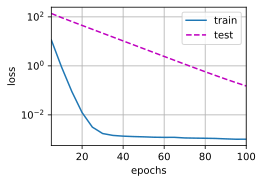

In [130]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())
    
train_concise(3)

# 4.6 暂退法（dropout）—— 另一种解决过拟合问题的方法

泛化性和灵活性之间的这种基本权衡被描述为**偏差-方差权衡（bias-variance tradeoff）。** 
线性模型有很高的偏差：它们只能表示一小类函数。 然而，这些模型的方差很低：它们在不同的随机数据样本上可以得出相似的结果。

毕晓普的想法应用于网络的内部层提出了一个想法：
在训练过程中，他们建议在计算后续层之前向网络的每一层注入噪声。
因为当训练一个有多层的深层网络时，注入噪声只会在输入-输出映射上增强平滑性。

这个想法被称为*暂退法*（dropout）。
暂退法在前向传播过程中，计算每一内部层的同时注入噪声，这已经成为训练神经网络的常用技术。
这种方法之所以被称为*暂退法*，因为我们从表面上看是在训练过程中丢弃（drop out）一些神经元。
在整个训练过程的每一次迭代中，标准暂退法包括在计算下一层之前将当前层中的一些节点置零。

在标准暂退法正则化中，通过按保留（未丢弃）的节点的分数进行规范化来消除每一层的偏差。
换言之，每个中间活性值$h$以*暂退概率*$p$由随机变量$h'$替换，如下所示：

$$
\begin{aligned}
h' =
\begin{cases}
    0 & \text{ 概率为 } p \\
    \frac{h}{1-p} & \text{ 其他情况}
\end{cases}
\end{aligned}
$$

根据此模型的设计，其期望值保持不变，即$E[h'] = h$。

## 从零开始实现

要实现单层的暂退法函数，
我们从均匀分布$U[0, 1]$中抽取样本，样本数与这层神经网络的维度一致。
然后我们保留那些对应样本大于$p$的节点，把剩下的丢弃。

在下面的代码中，(**我们实现 `dropout_layer` 函数，
该函数以`dropout`的概率丢弃张量输入`X`中的元素**)，
如上所述重新缩放剩余部分：将剩余部分除以`1.0-dropout`。

In [132]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

测试dropout的效果

In [133]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  0.,  6.,  0.,  0., 12., 14.],
        [16.,  0.,  0., 22., 24.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


### 定义模型

我们可以将暂退法应用于每个隐藏层的输出（在激活函数之后），
并且可以为每一层分别设置暂退概率：
常见的技巧是在靠近输入层的地方设置较低的暂退概率。
下面的模型将第一个和第二个隐藏层的暂退概率分别设置为0.2和0.5，
并且暂退法只在训练期间有效。


In [135]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

### 训练和测试

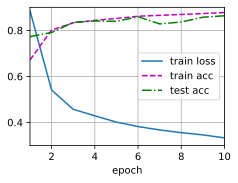

In [138]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=28)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## [**简洁实现**]

对于深度学习框架的高级API，我们只需在每个全连接层之后添加一个`Dropout`层，
将暂退概率作为唯一的参数传递给它的构造函数。
在训练时，`Dropout`层将根据指定的暂退概率随机丢弃上一层的输出（相当于下一层的输入）。
在测试时，`Dropout`层仅传递数据。


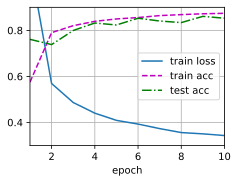

In [139]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 4.7 前向传播与反向传播

### 神经网络计算包括向前传播和向后传播两个部分，向前传播是前面提到的从输入到输出一层一层的运算，向后传播是完成一次向前传播后，更新参数W和b的过程。

## 4.7.1 前向传播

*前向传播*（forward propagation或forward pass）
指的是：按顺序（从输入层到输出层）计算和存储神经网络中每层的结果。

我们将一步步研究单隐藏层神经网络的机制，
为了简单起见，我们假设输入样本是 $\mathbf{x}\in \mathbb{R}^d$，
并且我们的隐藏层不包括偏置项。
这里的中间变量是：

$$\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x},$$

其中$\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$
是隐藏层的权重参数。
将中间变量$\mathbf{z}\in \mathbb{R}^h$通过激活函数$\phi$后，
我们得到长度为$h$的隐藏激活向量：

$$\mathbf{h}= \phi (\mathbf{z}).$$

隐藏变量$\mathbf{h}$也是一个中间变量。
假设输出层的参数只有权重$\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$，
我们可以得到输出层变量，它是一个长度为$q$的向量：

$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$

假设损失函数为$l$，样本标签为$y$，我们可以计算单个数据样本的损失项，

$$L = l(\mathbf{o}, y).$$

根据$L_2$正则化的定义，给定超参数$\lambda$，正则化项为

$$s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2\right),$$
:eqlabel:`eq_forward-s`

其中矩阵的Frobenius范数是将矩阵展平为向量后应用的$L_2$范数。
最后，模型在给定数据样本上的正则化损失为：

$$J = L + s.$$

在下面的讨论中，我们将$J$称为*目标函数*（objective function）。

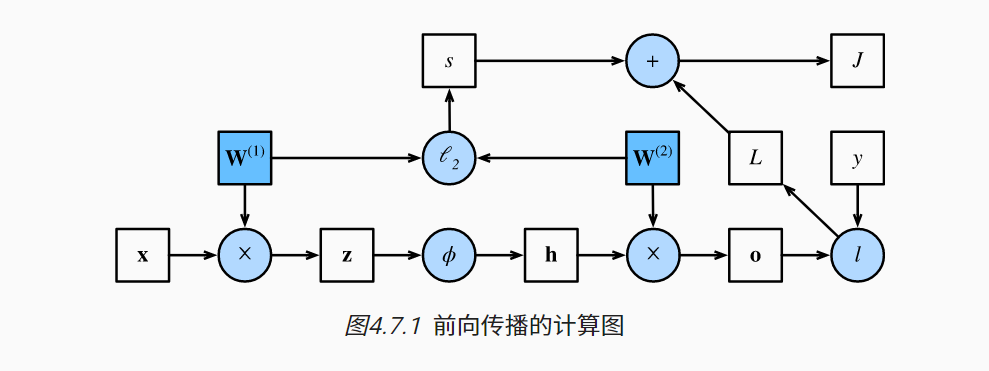

In [141]:
from IPython.display import Image
Image(filename=".\\image\\image\\向前传播过程图.png",width=600,height=400)

## 4.7.2 反向传播

*反向传播*（backward propagation或backpropagation）指的是计算神经网络参数梯度的方法。
简言之，该方法根据微积分中的*链式规则*，按相反的顺序从输出层到输入层遍历网络。
该算法存储了计算某些参数梯度时所需的任何中间变量（偏导数）。
假设我们有函数$\mathsf{Y}=f(\mathsf{X})$和$\mathsf{Z}=g(\mathsf{Y})$，
其中输入和输出$\mathsf{X}, \mathsf{Y}, \mathsf{Z}$是任意形状的张量。
利用链式法则，我们可以计算$\mathsf{Z}$关于$\mathsf{X}$的导数

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

在这里，我们使用$\text{prod}$运算符在执行必要的操作（如换位和交换输入位置）后将其参数相乘。
对于向量，这很简单，它只是矩阵-矩阵乘法。
对于高维张量，我们使用适当的对应项。
运算符$\text{prod}$指代了所有的这些符号。

回想一下，在计算图 :numref:`fig_forward`中的单隐藏层简单网络的参数是
$\mathbf{W}^{(1)}$和$\mathbf{W}^{(2)}$。
反向传播的目的是计算梯度$\partial J/\partial \mathbf{W}^{(1)}$和
$\partial J/\partial \mathbf{W}^{(2)}$。
为此，我们应用链式法则，依次计算每个中间变量和参数的梯度。
计算的顺序与前向传播中执行的顺序相反，因为我们需要从计算图的结果开始，并朝着参数的方向努力。第一步是计算目标函数$J=L+s$相对于损失项$L$和正则项$s$的梯度。

$$\frac{\partial J}{\partial L} = 1 \; \text{and} \; \frac{\partial J}{\partial s} = 1.$$

接下来，我们根据链式法则计算目标函数关于输出层变量$\mathbf{o}$的梯度：

$$
\frac{\partial J}{\partial \mathbf{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$

接下来，我们计算正则化项相对于两个参数的梯度：

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

现在我们可以计算最接近输出层的模型参数的梯度
$\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$。
使用链式法则得出：

$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$
:eqlabel:`eq_backprop-J-h`

为了获得关于$\mathbf{W}^{(1)}$的梯度，我们需要继续沿着输出层到隐藏层反向传播。
关于隐藏层输出的梯度$\partial J/\partial \mathbf{h} \in \mathbb{R}^h$由下式给出：

$$
\frac{\partial J}{\partial \mathbf{h}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$

由于激活函数$\phi$是按元素计算的，
计算中间变量$\mathbf{z}$的梯度$\partial J/\partial \mathbf{z} \in \mathbb{R}^h$
需要使用按元素乘法运算符，我们用$\odot$表示：

$$
\frac{\partial J}{\partial \mathbf{z}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$

最后，我们可以得到最接近输入层的模型参数的梯度
$\partial J/\partial \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$。
根据链式法则，我们得到：

$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$

## 4.7.3 训练神经网络

在训练神经网络时，前向传播和反向传播相互依赖。
对于前向传播，我们沿着依赖的方向遍历计算图并计算其路径上的所有变量。
然后将这些用于反向传播，其中计算顺序与计算图的相反。

以上述简单网络为例：一方面，在前向传播期间计算正则项取决于模型参数$\mathbf{W}^{(1)}$和
$\mathbf{W}^{(2)}$的当前值。
它们是由优化算法根据最近迭代的反向传播给出的。
另一方面，反向传播期间参数的梯度计算，
取决于由前向传播给出的隐藏变量$\mathbf{h}$的当前值。

因此，在训练神经网络时，在初始化模型参数后，
我们交替使用前向传播和反向传播，利用反向传播给出的梯度来更新模型参数。
注意，反向传播重复利用前向传播中存储的中间值，以避免重复计算。
带来的影响之一是我们需要保留中间值，直到反向传播完成。
这也是训练比单纯的预测需要更多的内存（显存）的原因之一。
此外，这些中间值的大小与网络层的数量和批量的大小大致成正比。
因此，使用更大的批量来训练更深层次的网络更容易导致*内存不足*（out of memory）错误。

# 4.8 梯度爆炸、梯度消失与模型初始化

到目前为止，我们实现的每个模型都是根据某个预先指定的分布来初始化模型的参数。
有人会认为初始化方案是理所当然的，忽略了如何做出这些选择的细节。甚至有人可能会觉得，初始化方案的选择并不是特别重要。
相反，初始化方案的选择在神经网络学习中起着举足轻重的作用，
它对保持数值稳定性至关重要。
此外，这些初始化方案的选择可以与非线性激活函数的选择有趣的结合在一起。
我们选择哪个函数以及如何初始化参数可以决定优化算法收敛的速度有多快。
糟糕选择可能会导致我们在训练时遇到梯度爆炸或梯度消失。

## 4.8.1 梯度消失和梯度爆炸

考虑一个具有$L$层、输入$\mathbf{x}$和输出$\mathbf{o}$的深层网络。
每一层$l$由变换$f_l$定义，
该变换的参数为权重$\mathbf{W}^{(l)}$，
其隐藏变量是$\mathbf{h}^{(l)}$（令 $\mathbf{h}^{(0)} = \mathbf{x}$）。
我们的网络可以表示为：

$$\mathbf{h}^{(l)} = f_l (\mathbf{h}^{(l-1)}) \text{ 因此 } \mathbf{o} = f_L \circ \ldots \circ f_1(\mathbf{x}).$$

如果所有隐藏变量和输入都是向量，
我们可以将$\mathbf{o}$关于任何一组参数$\mathbf{W}^{(l)}$的梯度写为下式：

$$\partial_{\mathbf{W}^{(l)}} \mathbf{o} = \underbrace{\partial_{\mathbf{h}^{(L-1)}} \mathbf{h}^{(L)}}_{ \mathbf{M}^{(L)} \stackrel{\mathrm{def}}{=}} \cdot \ldots \cdot \underbrace{\partial_{\mathbf{h}^{(l)}} \mathbf{h}^{(l+1)}}_{ \mathbf{M}^{(l+1)} \stackrel{\mathrm{def}}{=}} \underbrace{\partial_{\mathbf{W}^{(l)}} \mathbf{h}^{(l)}}_{ \mathbf{v}^{(l)} \stackrel{\mathrm{def}}{=}}.$$

换言之，该梯度是$L-l$个矩阵
$\mathbf{M}^{(L)} \cdot \ldots \cdot \mathbf{M}^{(l+1)}$
与梯度向量 $\mathbf{v}^{(l)}$的乘积。
因此，我们容易受到数值下溢问题的影响.
当将太多的概率乘在一起时，这些问题经常会出现。
在处理概率时，一个常见的技巧是切换到对数空间，
即将数值表示的压力从尾数转移到指数。
不幸的是，上面的问题更为严重：
最初，矩阵 $\mathbf{M}^{(l)}$ 可能具有各种各样的特征值。
他们可能很小，也可能很大；
他们的乘积可能非常大，也可能非常小。


### 为什么梯度爆炸和梯度消失问题很重要？

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

回顾参数更新过程，是依赖于小批量梯度下降法来更新的。
不稳定梯度带来的风险不止在于数值表示；
不稳定梯度也威胁到我们优化算法的稳定性。
我们可能面临一些问题。
要么是*梯度爆炸*（gradient exploding）问题：
参数更新过大，破坏了模型的稳定收敛；
要么是*梯度消失*（gradient vanishing）问题：
参数更新过小，在每次更新时几乎不会移动，导致模型无法学习。


### [**梯度消失**]

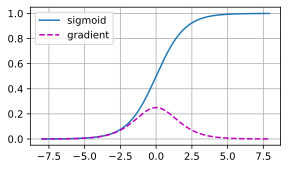

In [143]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

正如上图，当sigmoid函数的输入很大或是很小时，它的梯度都会消失。
此外，当反向传播通过许多层时，除非我们在刚刚好的地方，
这些地方sigmoid函数的输入接近于零，否则整个乘积的梯度可能会消失。
当我们的网络有很多层时，除非我们很小心，否则在某一层可能会切断梯度。
事实上，这个问题曾经困扰着深度网络的训练。
因此，更稳定的ReLU系列函数已经成为从业者的默认选择（虽然在神经科学的角度看起来不太合理）。

### [**梯度爆炸**]

相反，梯度爆炸可能同样令人烦恼。
为了更好地说明这一点，我们生成100个高斯随机矩阵，并将它们与某个初始矩阵相乘。
对于我们选择的尺度（方差$\sigma^2=1$），矩阵乘积发生爆炸。
当这种情况是由于深度网络的初始化所导致时，我们没有机会让梯度下降优化器收敛。


In [144]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[ 0.8439,  0.6983, -0.7465, -0.8448],
        [-2.2483,  0.7862,  1.0968, -0.3922],
        [-0.4071,  0.5218, -0.1438,  1.2044],
        [ 1.6552,  1.0015, -0.1681, -0.7260]])
乘以100个矩阵后
 tensor([[-4.3714e+22, -2.0971e+22, -2.4724e+22,  2.5909e+22],
        [ 4.6878e+22,  2.2489e+22,  2.6514e+22, -2.7785e+22],
        [ 5.9971e+21,  2.8769e+21,  3.3919e+21, -3.5545e+21],
        [-3.5778e+22, -1.7164e+22, -2.0236e+22,  2.1206e+22]])


### 打破对称性

神经网络设计中的另一个问题是其参数化所固有的对称性。
假设我们有一个简单的多层感知机，它有一个隐藏层和两个隐藏单元。
在这种情况下，我们可以对第一层的权重$\mathbf{W}^{(1)}$进行重排列，
并且同样对输出层的权重进行重排列，可以获得相同的函数。
第一个隐藏单元与第二个隐藏单元没有什么特别的区别。
换句话说，我们在每一层的隐藏单元之间具有排列对称性。

假设输出层将上述两个隐藏单元的多层感知机转换为仅一个输出单元。
想象一下，如果我们将隐藏层的所有参数初始化为$\mathbf{W}^{(1)} = c$，
$c$为常量，会发生什么？
在这种情况下，在前向传播期间，两个隐藏单元采用相同的输入和参数，
产生相同的激活，该激活被送到输出单元。
在反向传播期间，根据参数$\mathbf{W}^{(1)}$对输出单元进行微分，
得到一个梯度，其元素都取相同的值。
因此，在基于梯度的迭代（例如，小批量随机梯度下降）之后，
$\mathbf{W}^{(1)}$的所有元素仍然采用相同的值。
这样的迭代永远不会打破对称性，我们可能永远也无法实现网络的表达能力。
隐藏层的行为就好像只有一个单元。
请注意，虽然小批量随机梯度下降不会打破这种对称性，但暂退法正则化可以。

## 4.8.2 参数初始化

解决（或至少减轻）上述问题的一种方法是进行参数初始化，
优化期间的注意和适当的正则化也可以进一步提高稳定性。

### 默认初始化

在前面的部分中，例如在 :numref:`sec_linear_concise`中，
我们使用正态分布来初始化权重值。如果我们不指定初始化方法，
框架将使用默认的随机初始化方法，对于中等难度的问题，这种方法通常很有效。

### Xavier初始化

让我们看看某些*没有非线性*的全连接层输出（例如，隐藏变量）$o_{i}$的尺度分布。
对于该层$n_\mathrm{in}$输入$x_j$及其相关权重$w_{ij}$，输出由下式给出

$$o_{i} = \sum_{j=1}^{n_\mathrm{in}} w_{ij} x_j.$$

权重$w_{ij}$都是从同一分布中独立抽取的。
此外，让我们假设该分布具有零均值和方差$\sigma^2$。
请注意，这并不意味着分布必须是高斯的，只是均值和方差需要存在。
现在，让我们假设层$x_j$的输入也具有零均值和方差$\gamma^2$，
并且它们独立于$w_{ij}$并且彼此独立。
在这种情况下，我们可以按如下方式计算$o_i$的平均值和方差：

$$
\begin{aligned}
    E[o_i] & = \sum_{j=1}^{n_\mathrm{in}} E[w_{ij} x_j] \\&= \sum_{j=1}^{n_\mathrm{in}} E[w_{ij}] E[x_j] \\&= 0, \\
    \mathrm{Var}[o_i] & = E[o_i^2] - (E[o_i])^2 \\
        & = \sum_{j=1}^{n_\mathrm{in}} E[w^2_{ij} x^2_j] - 0 \\
        & = \sum_{j=1}^{n_\mathrm{in}} E[w^2_{ij}] E[x^2_j] \\
        & = n_\mathrm{in} \sigma^2 \gamma^2.
\end{aligned}
$$

保持方差不变的一种方法是设置$n_\mathrm{in} \sigma^2 = 1$。
现在考虑反向传播过程，我们面临着类似的问题，尽管梯度是从更靠近输出的层传播的。
使用与前向传播相同的推断，我们可以看到，除非$n_\mathrm{out} \sigma^2 = 1$，
否则梯度的方差可能会增大，其中$n_\mathrm{out}$是该层的输出的数量。
这使得我们进退两难：我们不可能同时满足这两个条件。
相反，我们只需满足：

$$
\begin{aligned}
\frac{1}{2} (n_\mathrm{in} + n_\mathrm{out}) \sigma^2 = 1 \text{ 或等价于 }
\sigma = \sqrt{\frac{2}{n_\mathrm{in} + n_\mathrm{out}}}.
\end{aligned}
$$

这就是现在标准且实用的*Xavier初始化*的基础，
它以其提出者的第一作者的名字命名。
通常，Xavier初始化从均值为零，方差
$\sigma^2 = \frac{2}{n_\mathrm{in} + n_\mathrm{out}}$
的高斯分布中采样权重。
我们也可以将其改为选择从均匀分布中抽取权重时的方差。
注意均匀分布$U(-a, a)$的方差为$\frac{a^2}{3}$。
将$\frac{a^2}{3}$代入到$\sigma^2$的条件中，将得到初始化值域：

$$U\left(-\sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}, \sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}\right).$$

尽管在上述数学推理中，“不存在非线性”的假设在神经网络中很容易被违反，
但Xavier初始化方法在实践中被证明是有效的。


# 4.9 环境与分布偏移

### 通过将基于模型的决策引入环境，我们可能会破坏模型。

有时，根据测试集的精度衡量，模型表现得非常出色。
但是当数据分布突然改变时，模型在部署中会出现灾难性的失败。
更隐蔽的是，有时模型的部署本身就是扰乱数据分布的催化剂。
举一个有点荒谬却可能真实存在的例子。
假设我们训练了一个贷款申请人违约风险模型，用来预测谁将偿还贷款或违约。
这个模型发现申请人的鞋子与违约风险相关（穿牛津鞋申请人会偿还，穿运动鞋申请人会违约）。
此后，这个模型可能倾向于向所有穿着牛津鞋的申请人发放贷款，并拒绝所有穿着运动鞋的申请人。

这种情况可能会带来灾难性的后果。
首先，一旦模型开始根据鞋类做出决定，顾客就会理解并改变他们的行为。
不久，所有的申请者都会穿牛津鞋，而信用度却没有相应的提高。
总而言之，机器学习的许多应用中都存在类似的问题：


## 4.9.1 分布偏移的类型

首先，我们考虑数据分布可能发生变化的各种方式，以及为挽救模型性能可能采取的措施。
在一个经典的情景中，假设训练数据是从某个分布$p_S(\mathbf{x},y)$中采样的，
但是测试数据将包含从不同分布$p_T(\mathbf{x},y)$中抽取的未标记样本。
一个清醒的现实是：如果没有任何关于$p_S$和$p_T$之间相互关系的假设，
学习到一个分类器是不可能的。

考虑一个二元分类问题：区分狗和猫。
如果分布可以以任意方式偏移，那么我们的情景允许病态的情况，
即输入的分布保持不变：$p_S(\mathbf{x}) = p_T(\mathbf{x})$，
但标签全部翻转：$p_S(y | \mathbf{x}) = 1 - p_T(y | \mathbf{x})$。
换言之，如果将来所有的“猫”现在都是狗，而我们以前所说的“狗”现在是猫。
而此时输入$p(\mathbf{x})$的分布没有任何改变，
那么我们就不可能将这种情景与分布完全没有变化的情景区分开。

幸运的是，在对未来我们的数据可能发生变化的一些限制性假设下，
有些算法可以检测这种偏移，甚至可以动态调整，提高原始分类器的精度。

### 协变量偏移

在不同分布偏移中，协变量偏移可能是最为广泛研究的。
这里我们假设：虽然输入的分布可能随时间而改变，
但标签函数（即条件分布$P(y \mid \mathbf{x})$）没有改变。
统计学家称之为*协变量偏移*（covariate shift），
因为这个问题是由于协变量（特征）分布的变化而产生的。
虽然有时我们可以在不引用因果关系的情况下对分布偏移进行推断，
但在我们认为$\mathbf{x}$导致$y$的情况下，协变量偏移是一种自然假设。


训练集由真实照片组成，而测试集只包含卡通图片。
假设在一个与测试集的特征有着本质不同的数据集上进行训练，
如果没有方法来适应新的领域，可能会有麻烦。

### 标签偏移

*标签偏移*（label shift）描述了与协变量偏移相反的问题。
这里我们假设标签边缘概率$P(y)$可以改变，
但是类别条件分布$P(\mathbf{x} \mid y)$在不同的领域之间保持不变。
当我们认为$y$导致$\mathbf{x}$时，标签偏移是一个合理的假设。
例如，预测患者的疾病，我们可能根据症状来判断，
即使疾病的相对流行率随着时间的推移而变化。
标签偏移在这里是恰当的假设，因为疾病会引起症状。
在另一些情况下，标签偏移和协变量偏移假设可以同时成立。
例如，当标签是确定的，即使$y$导致$\mathbf{x}$，协变量偏移假设也会得到满足。
有趣的是，在这些情况下，使用基于标签偏移假设的方法通常是有利的。
这是因为这些方法倾向于包含看起来像标签（通常是低维）的对象，
而不是像输入（通常是高维的）对象。

### 概念偏移

我们也可能会遇到*概念偏移*（concept shift）：
当标签的定义发生变化时，就会出现这种问题。
这听起来很奇怪——一只猫就是一只猫，不是吗？
然而，其他类别会随着不同时间的用法而发生变化。
精神疾病的诊断标准、所谓的时髦、以及工作头衔等等，都是概念偏移的日常映射。
事实证明，假如我们环游美国，根据所在的地理位置改变我们的数据来源，
我们会发现关于“软饮”名称的分布发生了相当大的概念偏移，

如果我们要建立一个机器翻译系统，
$P(y \mid \mathbf{x})$的分布可能会因我们的位置不同而得到不同的翻译。
这个问题可能很难被发现。
所以，我们最好可以利用在时间或空间上逐渐发生偏移的知识。

## 4.9.2 分布偏移示例

在深入研究形式体系和算法之前，我们可以讨论一些协变量偏移或概念偏移可能并不明显的具体情况。

### 医学诊断

假设我们想设计一个检测癌症的算法，从健康人和病人那里收集数据，然后训练算法。
它工作得很好，有很高的精度，然后我们得出了已经准备好在医疗诊断上取得成功的结论。
请先别着急。

收集训练数据的分布和在实际中遇到的数据分布可能有很大的不同。
这件事在一个不幸的初创公司身上发生过，我们中的一些作者几年前和他们合作过。
他们正在研究一种血液检测方法，主要针对一种影响老年男性的疾病，
并希望利用他们从病人身上采集的血液样本进行研究。
然而，从健康男性身上获取血样比从系统中已有的病人身上获取要困难得多。
作为补偿，这家初创公司向一所大学校园内的学生征集献血，作为开发测试的健康对照样本。
然后这家初创公司问我们是否可以帮助他们建立一个用于检测疾病的分类器。

正如我们向他们解释的那样，用近乎完美的精度来区分健康和患病人群确实很容易。
然而，这可能是因为受试者在年龄、激素水平、体力活动、
饮食、饮酒以及其他许多与疾病无关的因素上存在差异。
这对检测疾病的分类器可能并不适用。
这些抽样可能会遇到极端的协变量偏移。
此外，这种情况不太可能通过常规方法加以纠正。
简言之，他们浪费了一大笔钱。

### 自动驾驶汽车

对于一家想利用机器学习来开发自动驾驶汽车的公司，一个关键部件是“路沿检测器”。
由于真实的注释数据获取成本很高，他们想出了一个“聪明”的想法：
将游戏渲染引擎中的合成数据用作额外的训练数据。
这对从渲染引擎中抽取的“测试数据”非常有效，但应用在一辆真正的汽车里真是一场灾难。
正如事实证明的那样，路沿被渲染成一种非常简单的纹理。
更重要的是，所有的路沿都被渲染成了相同的纹理，路沿检测器很快就学习到了这个“特征”。

当美军第一次试图在森林中探测坦克时，也发生了类似的事情。
他们在没有坦克的情况下拍摄了森林的航拍照片，然后把坦克开进森林，拍摄了另一组照片。
使用这两组数据训练的分类器似乎工作得很好。
不幸的是，分类器仅仅学会了如何区分有阴影的树和没有阴影的树：
第一组照片是在清晨拍摄的，而第二组是在中午拍摄的。

### 非平稳分布

当分布变化缓慢并且模型没有得到充分更新时，就会出现更微妙的情况：
*非平稳分布*（nonstationary distribution）。
以下是一些典型例子：

* 训练一个计算广告模型，但却没有经常更新（例如，一个2009年训练的模型不知道一个叫iPad的不知名新设备刚刚上市）；
* 建立一个垃圾邮件过滤器，它能很好地检测到所有垃圾邮件。但是，垃圾邮件发送者们变得聪明起来，制造出新的信息，看起来不像我们以前见过的任何垃圾邮件；
* 建立一个产品推荐系统，它在整个冬天都有效，但圣诞节过后很久还会继续推荐圣诞帽。

### 更多轶事

* 建立一个人脸检测器，它在所有基准测试中都能很好地工作，但是它在测试数据上失败了：有问题的例子是人脸充满了整个图像的特写镜头（训练集中没有这样的数据）。
* 为美国市场建立了一个网络搜索引擎，并希望将其部署到英国。
* 通过在一个大的数据集来训练图像分类器，其中每一个大类的数量在数据集近乎是平均的，比如1000个类别，每个类别由1000个图像表示。但是将该系统部署到真实世界中，照片的实际标签分布显然是不均匀的。

## 4.9.3 分布偏移纠正

正如我们所讨论的，在许多情况下训练和测试分布$P(\mathbf{x}, y)$是不同的。
在一些情况下，我们很幸运，不管协变量、标签或概念如何发生偏移，模型都能正常工作。
在另一些情况下，我们可以通过运用策略来应对这种偏移，从而做得更好。
本节的其余部分将着重于应对这种偏移的技术细节。

### 经验风险与实际风险

首先我们反思一下在模型训练期间到底发生了什么？
训练数据$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$
的特征和相关的标签经过迭代，在每一个小批量之后更新模型$f$的参数。
为了简单起见，我们不考虑正则化，因此极大地降低了训练损失：

$$\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n l(f(\mathbf{x}_i), y_i),$$

其中$l$是损失函数，用来度量：
给定标签$y_i$，预测$f(\mathbf{x}_i)$的“糟糕程度”。
统计学家称 :eqref:`eq_empirical-risk-min`中的这一项为经验风险。
*经验风险*（empirical risk）是为了近似 *真实风险*（true risk），
整个训练数据上的平均损失，即从其真实分布$p(\mathbf{x},y)$中
抽取的所有数据的总体损失的期望值：

$$E_{p(\mathbf{x}, y)} [l(f(\mathbf{x}), y)] = \int\int l(f(\mathbf{x}), y) p(\mathbf{x}, y) \;d\mathbf{x}dy.$$

然而在实践中，我们通常无法获得总体数据。
因此，*经验风险最小化*即在式中最小化经验风险，
是一种实用的机器学习策略，希望能近似最小化真实风险。

### 协变量偏移纠正

假设对于带标签的数据$(\mathbf{x}_i, y_i)$，
我们要评估$P(y \mid \mathbf{x})$。
然而观测值$\mathbf{x}_i$是从某些*源分布*$q(\mathbf{x})$中得出的，
而不是从*目标分布*$p(\mathbf{x})$中得出的。
幸运的是，依赖性假设意味着条件分布保持不变，即：
$p(y \mid \mathbf{x}) = q(y \mid \mathbf{x})$。
如果源分布$q(\mathbf{x})$是“错误的”，
我们可以通过在真实风险的计算中，使用以下简单的恒等式来进行纠正：

$$
\begin{aligned}
\int\int l(f(\mathbf{x}), y) p(y \mid \mathbf{x})p(\mathbf{x}) \;d\mathbf{x}dy =
\int\int l(f(\mathbf{x}), y) q(y \mid \mathbf{x})q(\mathbf{x})\frac{p(\mathbf{x})}{q(\mathbf{x})} \;d\mathbf{x}dy.
\end{aligned}
$$

换句话说，我们需要根据数据来自正确分布与来自错误分布的概率之比，
来重新衡量每个数据样本的权重：

$$\beta_i \stackrel{\mathrm{def}}{=} \frac{p(\mathbf{x}_i)}{q(\mathbf{x}_i)}.$$

将权重$\beta_i$代入到每个数据样本$(\mathbf{x}_i, y_i)$中，
我们可以使用”加权经验风险最小化“来训练模型：

$$\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n \beta_i l(f(\mathbf{x}_i), y_i).$$


由于不知道这个比率，我们需要估计它。
有许多方法都可以用，包括一些花哨的算子理论方法，
试图直接使用最小范数或最大熵原理重新校准期望算子。
对于任意一种这样的方法，我们都需要从两个分布中抽取样本：
“真实”的分布$p$，通过访问测试数据获取；
训练集$q$，通过人工合成的很容易获得。
请注意，我们只需要特征$\mathbf{x} \sim p(\mathbf{x})$，
不需要访问标签$y \sim p(y)$。

在这种情况下，有一种非常有效的方法可以得到几乎与原始方法一样好的结果：
*对数几率回归*（logistic regression）。
这是用于二元分类的softmax回归的一个特例。
综上所述，我们学习了一个分类器来区分从$p(\mathbf{x})$抽取的数据
和从$q(\mathbf{x})$抽取的数据。
如果无法区分这两个分布，则意味着相关的样本可能来自这两个分布中的任何一个。
另一方面，任何可以很好区分的样本都应该相应地显著增加或减少权重。

为了简单起见，假设我们分别从$p(\mathbf{x})$和$q(\mathbf{x})$
两个分布中抽取相同数量的样本。
现在用$z$标签表示：从$p$抽取的数据为$1$，从$q$抽取的数据为$-1$。
然后，混合数据集中的概率由下式给出

$$P(z=1 \mid \mathbf{x}) = \frac{p(\mathbf{x})}{p(\mathbf{x})+q(\mathbf{x})} \text{ and hence } \frac{P(z=1 \mid \mathbf{x})}{P(z=-1 \mid \mathbf{x})} = \frac{p(\mathbf{x})}{q(\mathbf{x})}.$$

因此，如果我们使用对数几率回归方法，其中
$P(z=1 \mid \mathbf{x})=\frac{1}{1+\exp(-h(\mathbf{x}))}$
（$h$是一个参数化函数），则很自然有：

$$
\beta_i = \frac{1/(1 + \exp(-h(\mathbf{x}_i)))}{\exp(-h(\mathbf{x}_i))/(1 + \exp(-h(\mathbf{x}_i)))} = \exp(h(\mathbf{x}_i)).
$$

因此，我们需要解决两个问题：
第一个问题是关于区分来自两个分布的数据；
第二个问题是关于 :eqref:`eq_weighted-empirical-risk-min`
中的加权经验风险的最小化问题。
在这个问题中，我们将对其中的项加权$\beta_i$。

现在，我们来看一下完整的协变量偏移纠正算法。
假设我们有一个训练集$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$
和一个未标记的测试集$\{\mathbf{u}_1, \ldots, \mathbf{u}_m\}$。
对于协变量偏移，我们假设$1 \leq i \leq n$的$\mathbf{x}_i$来自某个源分布，
$\mathbf{u}_i$来自目标分布。
以下是纠正协变量偏移的典型算法：

1. 生成一个二元分类训练集：$\{(\mathbf{x}_1, -1), \ldots, (\mathbf{x}_n, -1), (\mathbf{u}_1, 1), \ldots, (\mathbf{u}_m, 1)\}$。
1. 用对数几率回归训练二元分类器得到函数$h$。
1. 使用$\beta_i = \exp(h(\mathbf{x}_i))$或更好的$\beta_i = \min(\exp(h(\mathbf{x}_i)), c)$（$c$为常量）对训练数据进行加权。
1. 使用权重$\beta_i$进行中$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$的训练。

请注意，上述算法依赖于一个重要的假设：
需要目标分布(例如，测试分布)中的每个数据样本在训练时出现的概率非零。
如果我们找到$p(\mathbf{x}) > 0$但$q(\mathbf{x}) = 0$的点，
那么相应的重要性权重会是无穷大。

### 标签偏移纠正

假设我们处理的是$k$个类别的分类任务。
使用相同符号，
$q$和$p$中分别是源分布（例如训练时的分布）和目标分布（例如测试时的分布）。
假设标签的分布随时间变化：$q(y) \neq p(y)$，
但类别条件分布保持不变：$q(\mathbf{x} \mid y)=p(\mathbf{x} \mid y)$。
如果源分布$q(y)$是“错误的”，
我们可以根据 :eqref:`eq_true-risk`中定义的真实风险中的恒等式进行更正：

$$
\begin{aligned}
\int\int l(f(\mathbf{x}), y) p(\mathbf{x} \mid y)p(y) \;d\mathbf{x}dy =
\int\int l(f(\mathbf{x}), y) q(\mathbf{x} \mid y)q(y)\frac{p(y)}{q(y)} \;d\mathbf{x}dy.
\end{aligned}
$$

这里，重要性权重将对应于标签似然比率

$$\beta_i \stackrel{\mathrm{def}}{=} \frac{p(y_i)}{q(y_i)}.$$

标签偏移的一个好处是，如果我们在源分布上有一个相当好的模型，
那么我们可以得到对这些权重的一致估计，而不需要处理周边的其他维度。
在深度学习中，输入往往是高维对象（如图像），而标签通常是低维（如类别）。

为了估计目标标签分布，我们首先采用性能相当好的现成的分类器（通常基于训练数据进行训练），
并使用验证集（也来自训练分布）计算其混淆矩阵。
混淆矩阵$\mathbf{C}$是一个$k \times k$矩阵，
其中每列对应于标签类别，每行对应于模型的预测类别。
每个单元格的值$c_{ij}$是验证集中，真实标签为$j$，
而我们的模型预测为$i$的样本数量所占的比例。

现在，我们不能直接计算目标数据上的混淆矩阵，
因为我们无法看到真实环境下的样本的标签，
除非我们再搭建一个复杂的实时标注流程。
然而，我们所能做的是将所有模型在测试时的预测取平均数，
得到平均模型输出$\mu(\hat{\mathbf{y}}) \in \mathbb{R}^k$，
其中第$i$个元素$\mu(\hat{y}_i)$是我们模型预测测试集中$i$的总预测分数。

结果表明，如果我们的分类器一开始就相当准确，
并且目标数据只包含我们以前见过的类别，
以及如果标签偏移假设成立（这里最强的假设），
我们就可以通过求解一个简单的线性系统来估计测试集的标签分布

$$\mathbf{C} p(\mathbf{y}) = \mu(\hat{\mathbf{y}}),$$

因为作为一个估计，$\sum_{j=1}^k c_{ij} p(y_j) = \mu(\hat{y}_i)$
对所有$1 \leq i \leq k$成立，
其中$p(y_j)$是$k$维标签分布向量$p(\mathbf{y})$的第$j^\mathrm{th}$元素。
如果我们的分类器一开始就足够精确，那么混淆矩阵$\mathbf{C}$将是可逆的，
进而我们可以得到一个解$p(\mathbf{y}) = \mathbf{C}^{-1} \mu(\hat{\mathbf{y}})$。

因为我们观测源数据上的标签，所以很容易估计分布$q(y)$。
那么对于标签为$y_i$的任何训练样本$i$，
我们可以使用我们估计的$p(y_i)/q(y_i)$比率来计算权重$\beta_i$，
并将其代入式中的加权经验风险最小化中。

### 概念偏移纠正

概念偏移很难用原则性的方式解决。
例如，在一个问题突然从“区分猫和狗”偏移为“区分白色和黑色动物”的情况下，
除了从零开始收集新标签和训练，别无妙方。
幸运的是，在实践中这种极端的偏移是罕见的。
相反，通常情况下，概念的变化总是缓慢的。
比如下面是一些例子：

* 在计算广告中，新产品推出后，旧产品变得不那么受欢迎了。这意味着广告的分布和受欢迎程度是逐渐变化的，任何点击率预测器都需要随之逐渐变化；
* 由于环境的磨损，交通摄像头的镜头会逐渐退化，影响摄像头的图像质量；
* 新闻内容逐渐变化（即新新闻的出现）。

在这种情况下，我们可以使用与训练网络相同的方法，使其适应数据的变化。
换言之，我们使用新数据更新现有的网络权重，而不是从头开始训练。
